In [1]:
import os

os.makedirs('./data', exist_ok=True)

!curl -L -o ./data/telco-customer-churn-ibm-dataset.zip \
    https://www.kaggle.com/api/v1/datasets/download/yeanzc/telco-customer-churn-ibm-dataset
# https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset
    
if os.path.exists('./data/telco-customer-churn-ibm-dataset.zip'):
    !unzip -o ./data/telco-customer-churn-ibm-dataset.zip -d ./data
    os.remove('./data/telco-customer-churn-ibm-dataset.zip')
else:
    print("File download failed. Please check the URL or your internet connection.")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1283k  100 1283k    0     0  1565k      0 --:--:-- --:--:-- --:--:-- 1565k
Archive:  ./data/telco-customer-churn-ibm-dataset.zip
  inflating: ./data/Telco_customer_churn.xlsx  


In [2]:
# for pandas to read excel
! pip install openpyxl
import pandas as pd

df = pd.read_excel('./data/Telco_customer_churn.xlsx')

print(df.head())
print(df.info())
print(df.describe())

   CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude   Longitude  Gender  ...        Contract  \
0  33.964131, -118.272783  33.964131 -118.272783    Male  ...  Month-to-month   
1   34.059281, -118.30742  34.059281 -118.307420  Female  ...  Month-to-month   
2  34.048013, -118.293953  34.048013 -118.293953  Female  ...  Month-to-month   
3  34.062125, -118.315709  34.062125 -118.315709  Female  ...  Month-to-month   
4  34.039224, -118.266293  34.039224 -118.266293    Male  ...  Month-to-month   

  Paperless Billing             Payment Method  Monthly Charges Tota

In [3]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [4]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [5]:
print(df['Churn Reason'])
df['Churn Reason'].unique()

0        Competitor made better offer
1                               Moved
2                               Moved
3                               Moved
4       Competitor had better devices
                    ...              
7038                              NaN
7039                              NaN
7040                              NaN
7041                              NaN
7042                              NaN
Name: Churn Reason, Length: 7043, dtype: object


array(['Competitor made better offer', 'Moved',
       'Competitor had better devices',
       'Competitor offered higher download speeds',
       'Competitor offered more data', 'Price too high',
       'Product dissatisfaction', 'Service dissatisfaction',
       'Lack of self-service on Website', 'Network reliability',
       'Limited range of services',
       'Lack of affordable download/upload speed',
       'Long distance charges', 'Extra data charges', "Don't know",
       'Poor expertise of online support',
       'Poor expertise of phone support', 'Attitude of service provider',
       'Attitude of support person', 'Deceased', nan], dtype=object)

In [6]:
df.loc[:,['Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason']]

,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,Yes,1,86,3239,Competitor made better offer
1,Yes,1,67,2701,Moved
2,Yes,1,86,5372,Moved
3,Yes,1,84,5003,Moved
4,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...
7038,No,0,45,5306,NaN
7039,No,0,59,2140,NaN
7040,No,0,71,5560,NaN
7041,No,0,59,2793,NaN


In [7]:
df.loc[:,['Tenure Months', 'Phone Service', 'Contract', 'Monthly Charges', 'Total Charges',]]

,Tenure Months,Phone Service,Contract,Monthly Charges,Total Charges
0,2,Yes,Month-to-month,53.85,108.15
1,2,Yes,Month-to-month,70.70,151.65
2,8,Yes,Month-to-month,99.65,820.5
3,28,Yes,Month-to-month,104.80,3046.05
4,49,Yes,Month-to-month,103.70,5036.3
...,...,...,...,...,...
7038,72,Yes,Two year,21.15,1419.4
7039,24,Yes,One year,84.80,1990.5
7040,72,Yes,One year,103.20,7362.9
7041,11,No,Month-to-month,29.60,346.45


In [8]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [9]:
df['Count'].unique()

array([1])

In [10]:
drop_columns = ['CustomerID', 'Count', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'CLTV', 'Churn Label', 'Churn Reason', 'Total Charges', 'Churn Score', 'Paperless Billing']
df = df.drop(columns=drop_columns, axis=1)
df

,Country,State,City,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,...,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Payment Method,Monthly Charges,Churn Value
0,United States,California,Los Angeles,Male,No,No,No,2,Yes,No,...,Yes,Yes,No,No,No,No,Month-to-month,Mailed check,53.85,1
1,United States,California,Los Angeles,Female,No,No,Yes,2,Yes,No,...,No,No,No,No,No,No,Month-to-month,Electronic check,70.70,1
2,United States,California,Los Angeles,Female,No,No,Yes,8,Yes,Yes,...,No,No,Yes,No,Yes,Yes,Month-to-month,Electronic check,99.65,1
3,United States,California,Los Angeles,Female,No,Yes,Yes,28,Yes,Yes,...,No,No,Yes,Yes,Yes,Yes,Month-to-month,Electronic check,104.80,1
4,United States,California,Los Angeles,Male,No,No,Yes,49,Yes,Yes,...,No,Yes,Yes,No,Yes,Yes,Month-to-month,Bank transfer (automatic),103.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,United States,California,Landers,Female,No,No,No,72,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Bank transfer (automatic),21.15,0
7039,United States,California,Adelanto,Male,No,Yes,Yes,24,Yes,Yes,...,Yes,No,Yes,Yes,Yes,Yes,One year,Mailed check,84.80,0
7040,United States,California,Amboy,Female,No,Yes,Yes,72,Yes,Yes,...,No,Yes,Yes,No,Yes,Yes,One year,Credit card (automatic),103.20,0
7041,United States,California,Angelus Oaks,Female,No,Yes,Yes,11,No,No phone service,...,Yes,No,No,No,No,No,Month-to-month,Electronic check,29.60,0


In [11]:
df['Online Backup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [12]:
df.iloc[7038,:]

Country                          United States
State                               California
City                                   Landers
Gender                                  Female
Senior Citizen                              No
Partner                                     No
Dependents                                  No
Tenure Months                               72
Phone Service                              Yes
Multiple Lines                              No
Internet Service                            No
Online Security            No internet service
Online Backup              No internet service
Device Protection          No internet service
Tech Support               No internet service
Streaming TV               No internet service
Streaming Movies           No internet service
Contract                              Two year
Payment Method       Bank transfer (automatic)
Monthly Charges                          21.15
Churn Value                                  0
Name: 7038, d

In [13]:
df.iloc[7042,:]

Country                          United States
State                               California
City                              Apple Valley
Gender                                    Male
Senior Citizen                              No
Partner                                     No
Dependents                                  No
Tenure Months                               66
Phone Service                              Yes
Multiple Lines                              No
Internet Service                   Fiber optic
Online Security                            Yes
Online Backup                               No
Device Protection                          Yes
Tech Support                               Yes
Streaming TV                               Yes
Streaming Movies                           Yes
Contract                              Two year
Payment Method       Bank transfer (automatic)
Monthly Charges                         105.65
Churn Value                                  0
Name: 7042, d

In [14]:
def binary_encoder(val):
    return 1 if 'yes' in val.lower().strip() else 0
        

In [15]:
df.columns

Index(['Country', 'State', 'City', 'Gender', 'Senior Citizen', 'Partner',
       'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Online Security', 'Online Backup',
       'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
       'Contract', 'Payment Method', 'Monthly Charges', 'Churn Value'],
      dtype='object')

In [16]:
td = df.loc[:,['Senior Citizen', 'Partner',
       'Dependents', 'Online Backup', 'Multiple Lines']]
td

,Senior Citizen,Partner,Dependents,Online Backup,Multiple Lines
0,No,No,No,Yes,No
1,No,No,Yes,No,No
2,No,No,Yes,No,Yes
3,No,Yes,Yes,No,Yes
4,No,No,Yes,Yes,Yes
...,...,...,...,...,...
7038,No,No,No,No internet service,No
7039,No,Yes,Yes,No,Yes
7040,No,Yes,Yes,Yes,Yes
7041,No,Yes,Yes,No,No phone service


In [17]:
td =td.applymap(binary_encoder)

/tmp/ipykernel_1438098/2980600664.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  td =td.applymap(binary_encoder)


In [18]:
td

,Senior Citizen,Partner,Dependents,Online Backup,Multiple Lines
0,0,0,0,1,0
1,0,0,1,0,0
2,0,0,1,0,1
3,0,1,1,0,1
4,0,0,1,1,1
...,...,...,...,...,...
7038,0,0,0,0,0
7039,0,1,1,0,1
7040,0,1,1,1,1
7041,0,1,1,0,0


In [19]:
# Check if there are any duplicate columns
print(df.columns[df.columns.duplicated()])


Index([], dtype='object')


In [20]:
df= df.drop_duplicates()
df = df.loc[:, ~df.columns.duplicated()]

In [21]:
binary_features = ['Senior Citizen','Partner','Dependents','Phone Service','Multiple Lines','Internet Service','Online Security','Online Backup','Device Protection','Tech Support','Streaming TV','Streaming Movies']
df.loc[:, binary_features] = df.loc[:, binary_features].applymap(binary_encoder)
df

/tmp/ipykernel_1438098/2569961825.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.loc[:, binary_features] = df.loc[:, binary_features].applymap(binary_encoder)


,Country,State,City,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,...,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Payment Method,Monthly Charges,Churn Value
0,United States,California,Los Angeles,Male,0,0,0,2,1,0,...,1,1,0,0,0,0,Month-to-month,Mailed check,53.85,1
1,United States,California,Los Angeles,Female,0,0,1,2,1,0,...,0,0,0,0,0,0,Month-to-month,Electronic check,70.70,1
2,United States,California,Los Angeles,Female,0,0,1,8,1,1,...,0,0,1,0,1,1,Month-to-month,Electronic check,99.65,1
3,United States,California,Los Angeles,Female,0,1,1,28,1,1,...,0,0,1,1,1,1,Month-to-month,Electronic check,104.80,1
4,United States,California,Los Angeles,Male,0,0,1,49,1,1,...,0,1,1,0,1,1,Month-to-month,Bank transfer (automatic),103.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,United States,California,Landers,Female,0,0,0,72,1,0,...,0,0,0,0,0,0,Two year,Bank transfer (automatic),21.15,0
7039,United States,California,Adelanto,Male,0,1,1,24,1,1,...,1,0,1,1,1,1,One year,Mailed check,84.80,0
7040,United States,California,Amboy,Female,0,1,1,72,1,1,...,0,1,1,0,1,1,One year,Credit card (automatic),103.20,0
7041,United States,California,Angelus Oaks,Female,0,1,1,11,0,0,...,1,0,0,0,0,0,Month-to-month,Electronic check,29.60,0


In [22]:
df.iloc[7041,:]

Country                 United States
State                      California
City                     Angelus Oaks
Gender                         Female
Senior Citizen                      0
Partner                             1
Dependents                          1
Tenure Months                      11
Phone Service                       0
Multiple Lines                      0
Internet Service                    0
Online Security                     1
Online Backup                       0
Device Protection                   0
Tech Support                        0
Streaming TV                        0
Streaming Movies                    0
Contract               Month-to-month
Payment Method       Electronic check
Monthly Charges                  29.6
Churn Value                         0
Name: 7041, dtype: object

In [23]:
df.columns

Index(['Country', 'State', 'City', 'Gender', 'Senior Citizen', 'Partner',
       'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Online Security', 'Online Backup',
       'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
       'Contract', 'Payment Method', 'Monthly Charges', 'Churn Value'],
      dtype='object')

In [24]:
df['Security Focused'] = df['Online Security']+ df['Online Backup'] + df['Device Protection']
df['Streaming'] = df['Streaming TV'] + df['Streaming Movies']
df = df.drop(columns=['Online Security', 'Online Backup',
       'Device Protection', 'Streaming TV', 'Streaming Movies'])

In [25]:
df

,Country,State,City,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Tech Support,Contract,Payment Method,Monthly Charges,Churn Value,Security Focused,Streaming
0,United States,California,Los Angeles,Male,0,0,0,2,1,0,0,0,Month-to-month,Mailed check,53.85,1,2,0
1,United States,California,Los Angeles,Female,0,0,1,2,1,0,0,0,Month-to-month,Electronic check,70.70,1,0,0
2,United States,California,Los Angeles,Female,0,0,1,8,1,1,0,0,Month-to-month,Electronic check,99.65,1,1,2
3,United States,California,Los Angeles,Female,0,1,1,28,1,1,0,1,Month-to-month,Electronic check,104.80,1,1,2
4,United States,California,Los Angeles,Male,0,0,1,49,1,1,0,0,Month-to-month,Bank transfer (automatic),103.70,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,United States,California,Landers,Female,0,0,0,72,1,0,0,0,Two year,Bank transfer (automatic),21.15,0,0,0
7039,United States,California,Adelanto,Male,0,1,1,24,1,1,0,1,One year,Mailed check,84.80,0,2,2
7040,United States,California,Amboy,Female,0,1,1,72,1,1,0,0,One year,Credit card (automatic),103.20,0,2,2
7041,United States,California,Angelus Oaks,Female,0,1,1,11,0,0,0,0,Month-to-month,Electronic check,29.60,0,1,0


In [26]:
df['Country'].unique()
# Only country is US
df['State'].unique()
# Only state is California
# Since all cities are from California
# Only 1 Value in Internet  Service
df = df.drop(columns=['Country', 'State', 'City', 'Internet Service'])
df

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Tech Support,Contract,Payment Method,Monthly Charges,Churn Value,Security Focused,Streaming
0,Male,0,0,0,2,1,0,0,Month-to-month,Mailed check,53.85,1,2,0
1,Female,0,0,1,2,1,0,0,Month-to-month,Electronic check,70.70,1,0,0
2,Female,0,0,1,8,1,1,0,Month-to-month,Electronic check,99.65,1,1,2
3,Female,0,1,1,28,1,1,1,Month-to-month,Electronic check,104.80,1,1,2
4,Male,0,0,1,49,1,1,0,Month-to-month,Bank transfer (automatic),103.70,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,0,0,0,72,1,0,0,Two year,Bank transfer (automatic),21.15,0,0,0
7039,Male,0,1,1,24,1,1,1,One year,Mailed check,84.80,0,2,2
7040,Female,0,1,1,72,1,1,0,One year,Credit card (automatic),103.20,0,2,2
7041,Female,0,1,1,11,0,0,0,Month-to-month,Electronic check,29.60,0,1,0


In [27]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()

df['Gender'] = label_encoder.fit_transform(df['Gender'])
df

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Tech Support,Contract,Payment Method,Monthly Charges,Churn Value,Security Focused,Streaming
0,1,0,0,0,2,1,0,0,Month-to-month,Mailed check,53.85,1,2,0
1,0,0,0,1,2,1,0,0,Month-to-month,Electronic check,70.70,1,0,0
2,0,0,0,1,8,1,1,0,Month-to-month,Electronic check,99.65,1,1,2
3,0,0,1,1,28,1,1,1,Month-to-month,Electronic check,104.80,1,1,2
4,1,0,0,1,49,1,1,0,Month-to-month,Bank transfer (automatic),103.70,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,72,1,0,0,Two year,Bank transfer (automatic),21.15,0,0,0
7039,1,0,1,1,24,1,1,1,One year,Mailed check,84.80,0,2,2
7040,0,0,1,1,72,1,1,0,One year,Credit card (automatic),103.20,0,2,2
7041,0,0,1,1,11,0,0,0,Month-to-month,Electronic check,29.60,0,1,0


In [28]:
df['Contract'] = label_encoder.fit_transform(df['Contract'])

In [29]:
df

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Tech Support,Contract,Payment Method,Monthly Charges,Churn Value,Security Focused,Streaming
0,1,0,0,0,2,1,0,0,0,Mailed check,53.85,1,2,0
1,0,0,0,1,2,1,0,0,0,Electronic check,70.70,1,0,0
2,0,0,0,1,8,1,1,0,0,Electronic check,99.65,1,1,2
3,0,0,1,1,28,1,1,1,0,Electronic check,104.80,1,1,2
4,1,0,0,1,49,1,1,0,0,Bank transfer (automatic),103.70,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,72,1,0,0,2,Bank transfer (automatic),21.15,0,0,0
7039,1,0,1,1,24,1,1,1,1,Mailed check,84.80,0,2,2
7040,0,0,1,1,72,1,1,0,1,Credit card (automatic),103.20,0,2,2
7041,0,0,1,1,11,0,0,0,0,Electronic check,29.60,0,1,0


In [30]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False)
payment_method_encoded = one_hot_encoder.fit_transform(df[['Payment Method']])
payment_method_encoded
print(one_hot_encoder.categories_)

[array(['Bank transfer (automatic)', 'Credit card (automatic)',
       'Electronic check', 'Mailed check'], dtype=object)]


In [31]:
payment_method_encoded_df = pd.DataFrame(
    payment_method_encoded, columns=one_hot_encoder.categories_[0]
)

In [32]:
payment_method_encoded_df

,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
7038,1.0,0.0,0.0,0.0
7039,0.0,0.0,0.0,1.0
7040,0.0,1.0,0.0,0.0
7041,0.0,0.0,1.0,0.0


In [33]:
df = pd.concat([df, payment_method_encoded_df], axis=1)
df = df.drop(columns=['Payment Method'])
df.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Tech Support,Contract,Monthly Charges,Churn Value,Security Focused,Streaming,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,1,0,0,0,2,1,0,0,0,53.85,1,2,0,0.0,0.0,0.0,1.0
1,0,0,0,1,2,1,0,0,0,70.70,1,0,0,0.0,0.0,1.0,0.0
2,0,0,0,1,8,1,1,0,0,99.65,1,1,2,0.0,0.0,1.0,0.0
3,0,0,1,1,28,1,1,1,0,104.80,1,1,2,0.0,0.0,1.0,0.0
4,1,0,0,1,49,1,1,0,0,103.70,1,2,2,1.0,0.0,0.0,0.0


In [34]:
# df[df.columns.difference(['Total Charges'])] = df[df.columns.difference(['Total Charges'])].apply(pd.to_numeric, errors = 'coerce').astype('int')
# df['Total Charges'] = df['Total Charges'].apply(pd.to_numeric, errors = 'coerce').astype('int')


In [35]:
df.dtypes

Gender                         int64
Senior Citizen                object
Partner                       object
Dependents                    object
Tenure Months                  int64
Phone Service                 object
Multiple Lines                object
Tech Support                  object
Contract                       int64
Monthly Charges              float64
Churn Value                    int64
Security Focused              object
Streaming                     object
Bank transfer (automatic)    float64
Credit card (automatic)      float64
Electronic check             float64
Mailed check                 float64
dtype: object

In [36]:
df[df.columns.difference(['Monthly Charges'])] = df[df.columns.difference(['Monthly Charges'])].apply(pd.to_numeric, errors = 'coerce').astype('int')
df['Monthly Charges'] = df['Monthly Charges'].apply(pd.to_numeric, errors = 'coerce')
df.dtypes

Gender                         int64
Senior Citizen                 int64
Partner                        int64
Dependents                     int64
Tenure Months                  int64
Phone Service                  int64
Multiple Lines                 int64
Tech Support                   int64
Contract                       int64
Monthly Charges              float64
Churn Value                    int64
Security Focused               int64
Streaming                      int64
Bank transfer (automatic)      int64
Credit card (automatic)        int64
Electronic check               int64
Mailed check                   int64
dtype: object

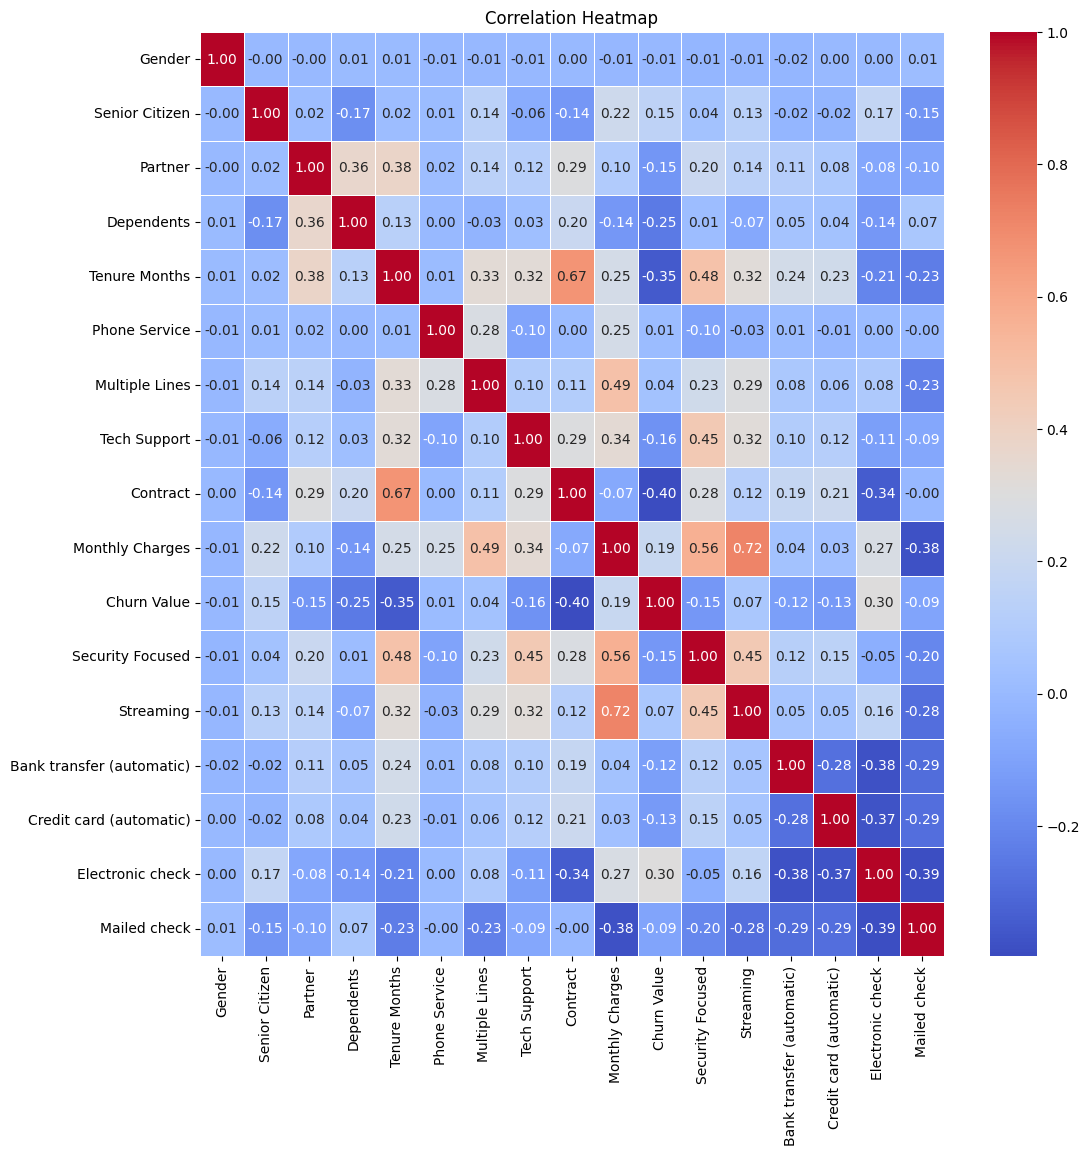

In [37]:
def get_corr_heatmap(df):
    import seaborn as sns
    import matplotlib.pyplot as plt

    correlation_matrix = df.corr()

    plt.figure(figsize=(12, 12))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Correlation Heatmap")
    plt.show()
    
get_corr_heatmap(df)

In [38]:
df

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Tech Support,Contract,Monthly Charges,Churn Value,Security Focused,Streaming,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,1,0,0,0,2,1,0,0,0,53.85,1,2,0,0,0,0,1
1,0,0,0,1,2,1,0,0,0,70.70,1,0,0,0,0,1,0
2,0,0,0,1,8,1,1,0,0,99.65,1,1,2,0,0,1,0
3,0,0,1,1,28,1,1,1,0,104.80,1,1,2,0,0,1,0
4,1,0,0,1,49,1,1,0,0,103.70,1,2,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,72,1,0,0,2,21.15,0,0,0,1,0,0,0
7039,1,0,1,1,24,1,1,1,1,84.80,0,2,2,0,0,0,1
7040,0,0,1,1,72,1,1,0,1,103.20,0,2,2,0,1,0,0
7041,0,0,1,1,11,0,0,0,0,29.60,0,1,0,0,0,1,0


In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Tenure Months', 'Monthly Charges']] = scaler.fit_transform(df[['Tenure Months', 'Monthly Charges']])

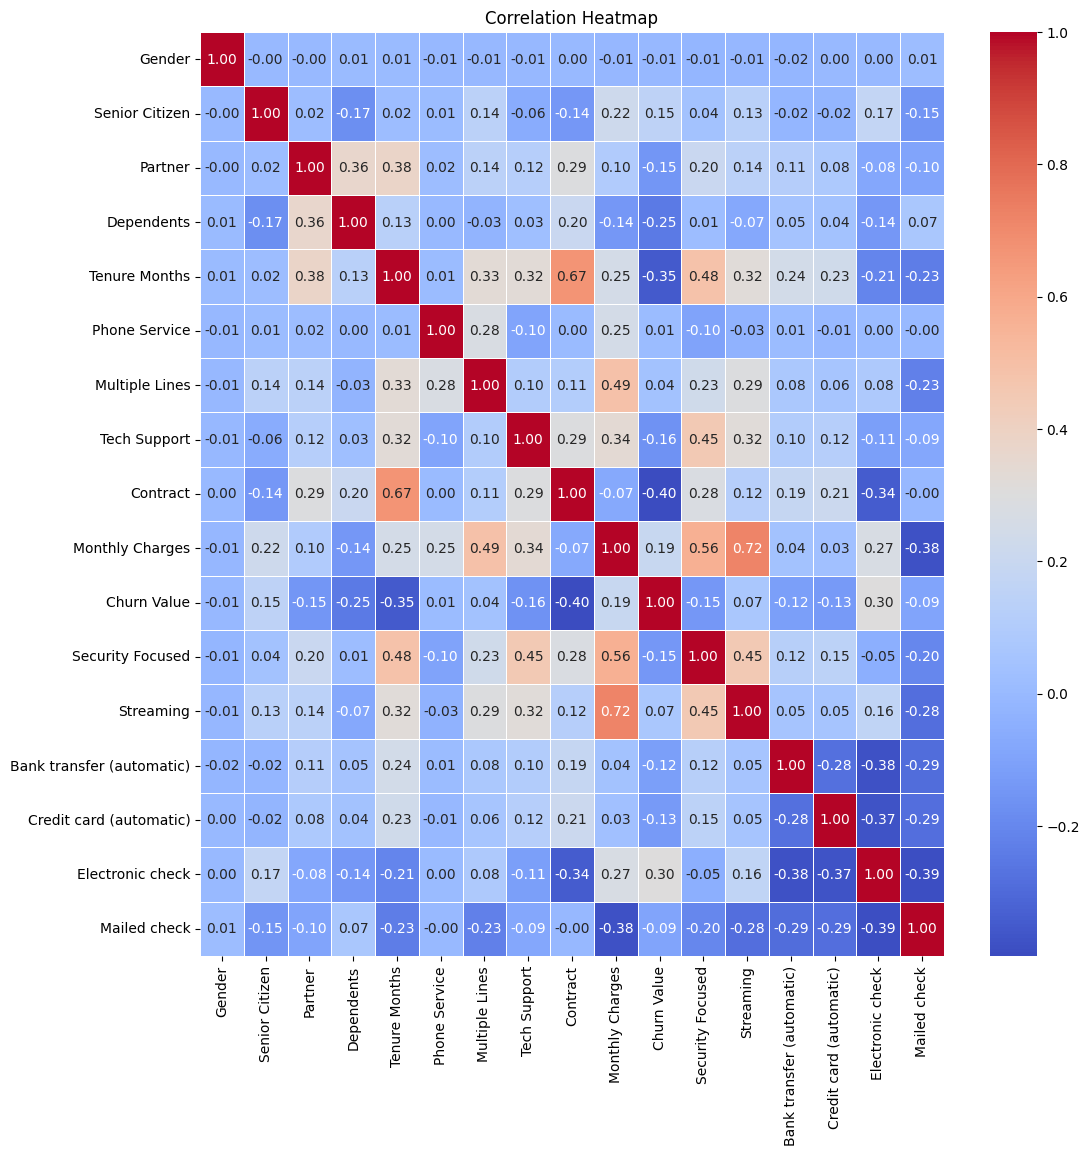

In [40]:
get_corr_heatmap(df)

There is High Correlation between
- Tenure Months ↔ Contract (0.67)
- Monthly Charges ↔ Streaming (0.72)
- Monthly Charges ↔ Security Focused (0.56)
- Multiple Lines ↔ Monthly Charges (0.49)

Thus
- (Dropping Contract) and keeping Monthly Charges as it provides more precise data (in months)
- (Dropping Streaming), Having Streaming services (TV or/and Movies) can increase Monthly Charges
- (Dropping Security) Customers with more monthly charges are more focused on Security.
- (Dropping Multiple Lines) Having More lines means more monthly charges.

In [48]:
# Without Dropping 

def get_vif_df(X):
    from statsmodels.stats.outliers_influence import variance_inflation_factor as get_vif

    vif_data = pd.DataFrame()
    vif_data['Feature'] = X.columns
    vif_data['VIF'] = [get_vif(X.values, i) for i in range(X.shape[1])]
    return vif_data
    
vif_data = get_vif_df(df.drop(columns=['Churn Value']))
print(vif_data)

                      Feature       VIF
0                      Gender  1.001069
1              Senior Citizen  1.129630
2                     Partner  1.340545
3                  Dependents  1.237963
4               Tenure Months  2.705168
5               Phone Service  1.464472
6              Multiple Lines  1.534468
7                Tech Support  1.433119
8                    Contract  2.402076
9             Monthly Charges  5.135564
10           Security Focused  2.255434
11                  Streaming  2.569488
12  Bank transfer (automatic)  7.437201
13    Credit card (automatic)  7.441223
14           Electronic check  9.900648
15               Mailed check  8.509020


In [49]:
vif_data

,Feature,VIF
0,Gender,1.001069
1,Senior Citizen,1.129630
2,Partner,1.340545
3,Dependents,1.237963
4,Tenure Months,2.705168
5,Phone Service,1.464472
6,Multiple Lines,1.534468
7,Tech Support,1.433119
8,Contract,2.402076
9,Monthly Charges,5.135564


Since Payment Methods has high VIF, dropping one of the payment methods

In [50]:
# Checking VIF by Dropping one of the payment methods

vif_data = get_vif_df(df.drop(columns=['Churn Value', 'Electronic check']))
vif_data

,Feature,VIF
0,Gender,1.940033
1,Senior Citizen,1.288837
2,Partner,2.542514
3,Dependents,1.609851
4,Tenure Months,2.451625
5,Phone Service,5.922531
6,Multiple Lines,2.555536
7,Tech Support,1.955899
8,Contract,4.039937
9,Monthly Charges,3.340968


In [51]:
df = df.drop(columns= ['Electronic check'])
df

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Tech Support,Contract,Monthly Charges,Churn Value,Security Focused,Streaming,Bank transfer (automatic),Credit card (automatic),Mailed check
0,1,0,0,0,-1.236724,1,0,0,0,-0.362660,1,2,0,0,0,1
1,0,0,0,1,-1.236724,1,0,0,0,0.197365,1,0,0,0,0,0
2,0,0,0,1,-0.992402,1,1,0,0,1.159546,1,1,2,0,0,0
3,0,0,1,1,-0.177995,1,1,1,0,1.330711,1,1,2,0,0,0
4,1,0,0,1,0.677133,1,1,0,0,1.294151,1,2,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,1.613701,1,0,0,2,-1.449476,0,0,0,1,0,0
7039,1,0,1,1,-0.340876,1,1,1,1,0.665992,0,2,2,0,0,1
7040,0,0,1,1,1.613701,1,1,0,1,1.277533,0,2,2,0,1,0
7041,0,0,1,1,-0.870241,0,0,0,0,-1.168632,0,1,0,0,0,0


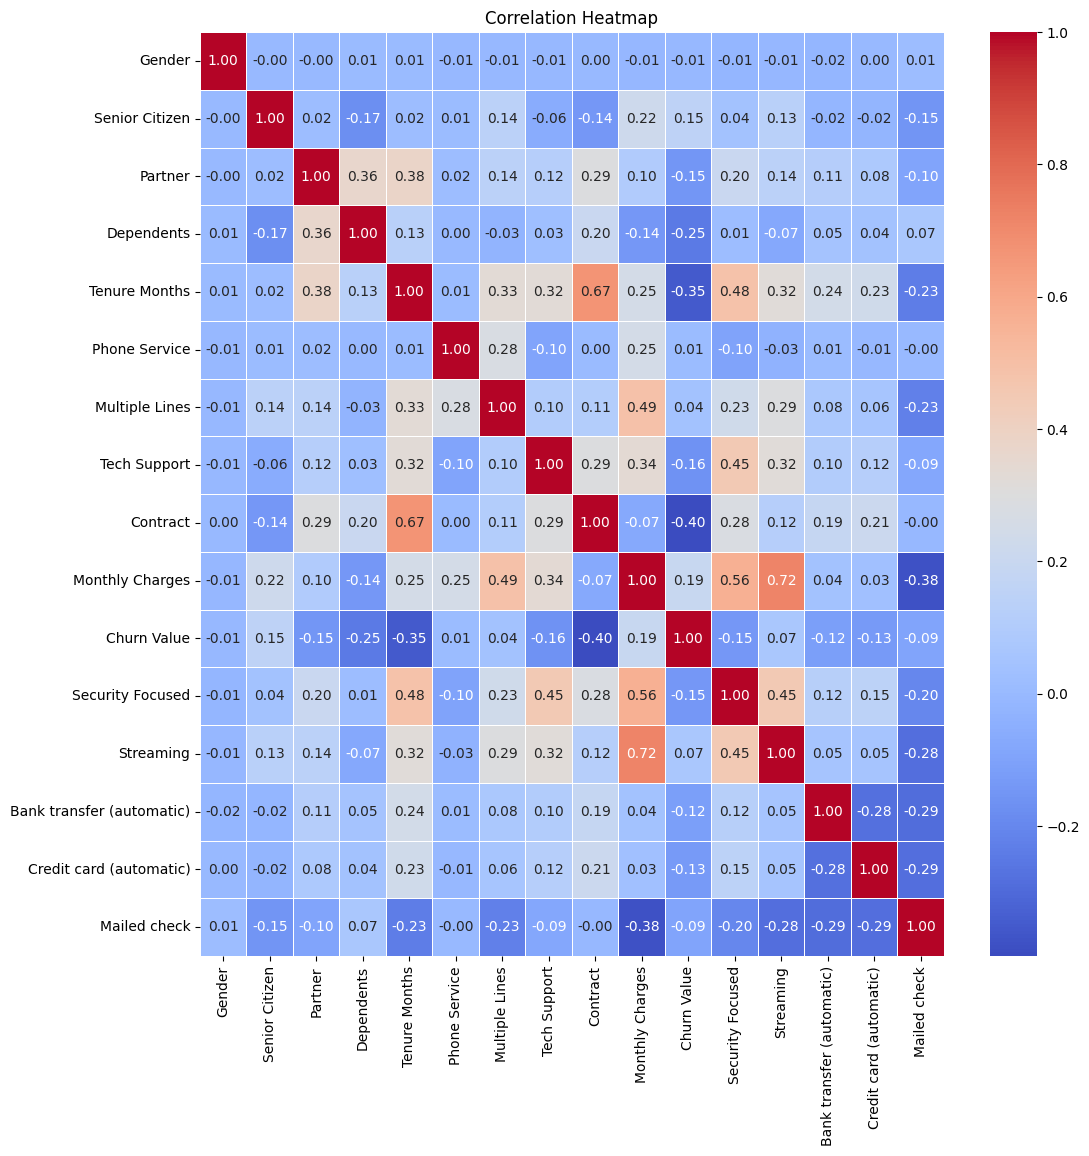

In [52]:
get_corr_heatmap(df)

In [53]:
df = df.drop(columns= ['Contract', 'Streaming', 'Security Focused', 'Monthly Charges'])
df

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Tech Support,Churn Value,Bank transfer (automatic),Credit card (automatic),Mailed check
0,1,0,0,0,-1.236724,1,0,0,1,0,0,1
1,0,0,0,1,-1.236724,1,0,0,1,0,0,0
2,0,0,0,1,-0.992402,1,1,0,1,0,0,0
3,0,0,1,1,-0.177995,1,1,1,1,0,0,0
4,1,0,0,1,0.677133,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,1.613701,1,0,0,0,1,0,0
7039,1,0,1,1,-0.340876,1,1,1,0,0,0,1
7040,0,0,1,1,1.613701,1,1,0,0,0,1,0
7041,0,0,1,1,-0.870241,0,0,0,0,0,0,0


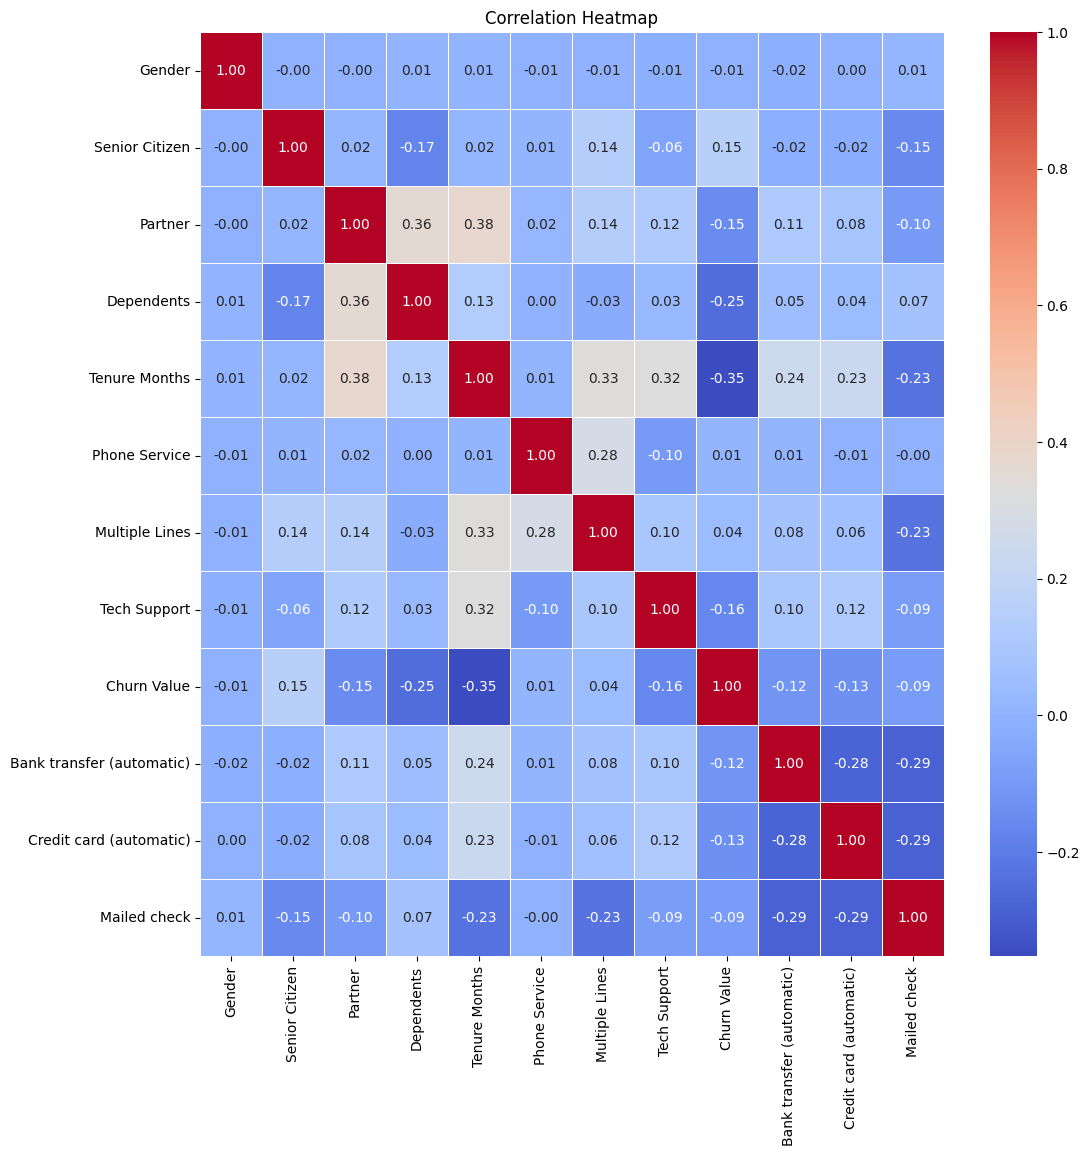

In [54]:
get_corr_heatmap(df)

Now the data does not have multicollinear features